# 1. Composition of Functions
This is a post that I have been excited to write for some time now. I realize that if you are reading this blog you most likely already have good handle on what a **function** is; both in the context's of mathematics and computer science. However, I recently saw just how shallow my own understanding was during my quest to understand the history of the **normal distribution**.

For those unfamiliar, I highly recommend go through my post on the subject (in the mathematics/statistics section), but for the sake of making this post 100% stand alone, I will provide a brief background; it is essential in setting the stage for the problem that we are trying to solve. Please keep in mind that the purpose of this notebook is _not_ to discuss statistics and probably distributions; these curves are simply being used as lens for which we can think about functions, function compositions, and how functions are discovered.

### 1.1 Background of Normal Distribution
The Normal Distribution, also known as the **Gaussian Distribution**, has an incredibly deep history, and even greater number of domains where it is applied; we will not talk about them here, however. For that I recommend looking through my other notebooks, digging into the **Central Limit Theorem**, **sampling**, **Gaussian Mixture Models**, distributions in the social sciences, **hypothesis testing**, and so on. 

The purpose of this post is to uncover what bothered me while learning about so many of the above topics: 

> Where did the equation that represents the Gaussian Distribution come from?

If you are unfamiliar with the normal distribution, here are a few key points:
* It is a **continuous** probability distribution (a continuous function).
* It is often used to describe a **random variable** whose distribution is not known, but is thought to represent a gaussian data generating process
* It plays a large role in **statistical inference** based on its use in the central limit theorem.

Mathematically, the Normal Distribution is defined as follows:

$$f(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} exp(-\frac{(x-\mu)^2}{2\sigma^2})$$

Where $\mu$ is the **mean**/**expectation** of the distribution, $\sigma$ is the **standard deviation**, and $\sigma^2$ is the **variance**. If you are rusty on your understanding of the prior term's definitions, I recommend reviewing my previous post. It is worth noting that the normal distribution is parameterized by $\mu$ and $\sigma^2$, and it can be stated verbally as:

> It is a curve representing the probability distribution of the random variable $x$ given $\mu$ and $\sigma^2$.


There is one point of confusion that isn't particulary important for our purposes, but that I will cover for clarity:
* The normal distribution is a **probability density function**. What this means is that we cannot simply plug in a value, $x$, and evaluate the probability of observing that particular value. This is because an continuous random variable can take on an _infinite_ number of values, and the probability of observing a particular one is zero. Instead, the normal distribution is evaluated at each $x$, and the curve that is produced (seen below) can be used to determine the probability that $x$ will fall in certain _intervals_. 
 

With that said, visually it looks like:

In [1]:
import numpy as np
from scipy.stats import bernoulli, binom, norm
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set(style="white", palette="husl")
sns.set_context("talk")
sns.set_style("ticks")

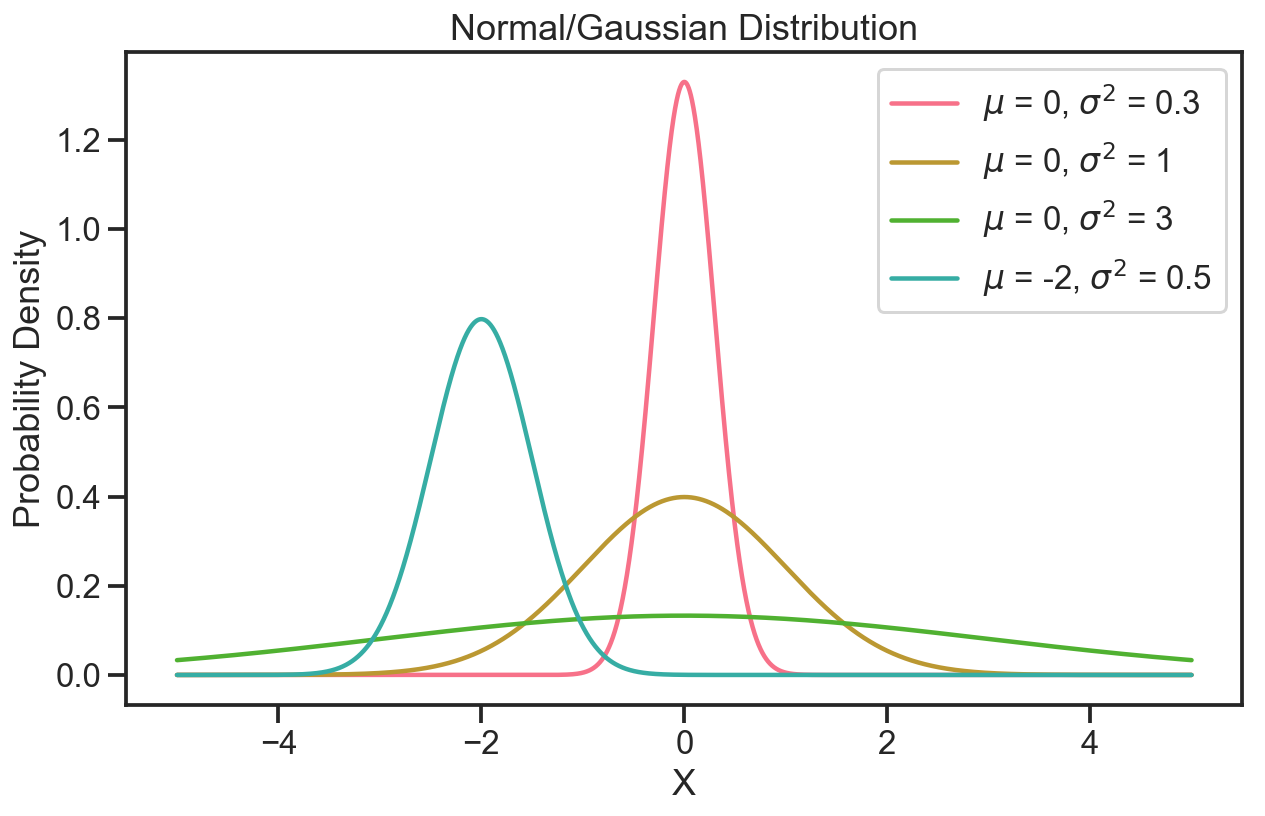

In [5]:
fig = plt.figure(figsize=(10,6))
means = [0, 0, 0, -2]
variances = [0.3, 1, 3, 0.5]
x_axis = np.arange(-5, 5, 0.001)
legend = []
for mu, var in zip(means, variances):
    plt.plot(x_axis, norm.pdf(x_axis,mu,var))
    legend.append(f'$\mu$ = {mu}, $\sigma^2$ = {var}')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Normal/Gaussian Distribution')
plt.legend(legend)

plt.show()

The graph above is incredibly important to keep in mind throughout this post! Take a moment to think above how on earth this was derived? Likewise, think about the shape (bell shape)-how would you take an input (the curve $y=x$), and transform it to have that shape? 

That was the problem that **[Abraham de Moivre](https://en.wikipedia.org/wiki/Abraham_de_Moivre)** faced in the mid 1700's. He and many colleagues, had observered that certain random processes began to take on the **binomial distribution** when repeated many times (green discrete distribution below). 

They realized that in order to keep their calculations computationaly feasible, they must determine an **approximation** to this discrete distribution (curve in red below).

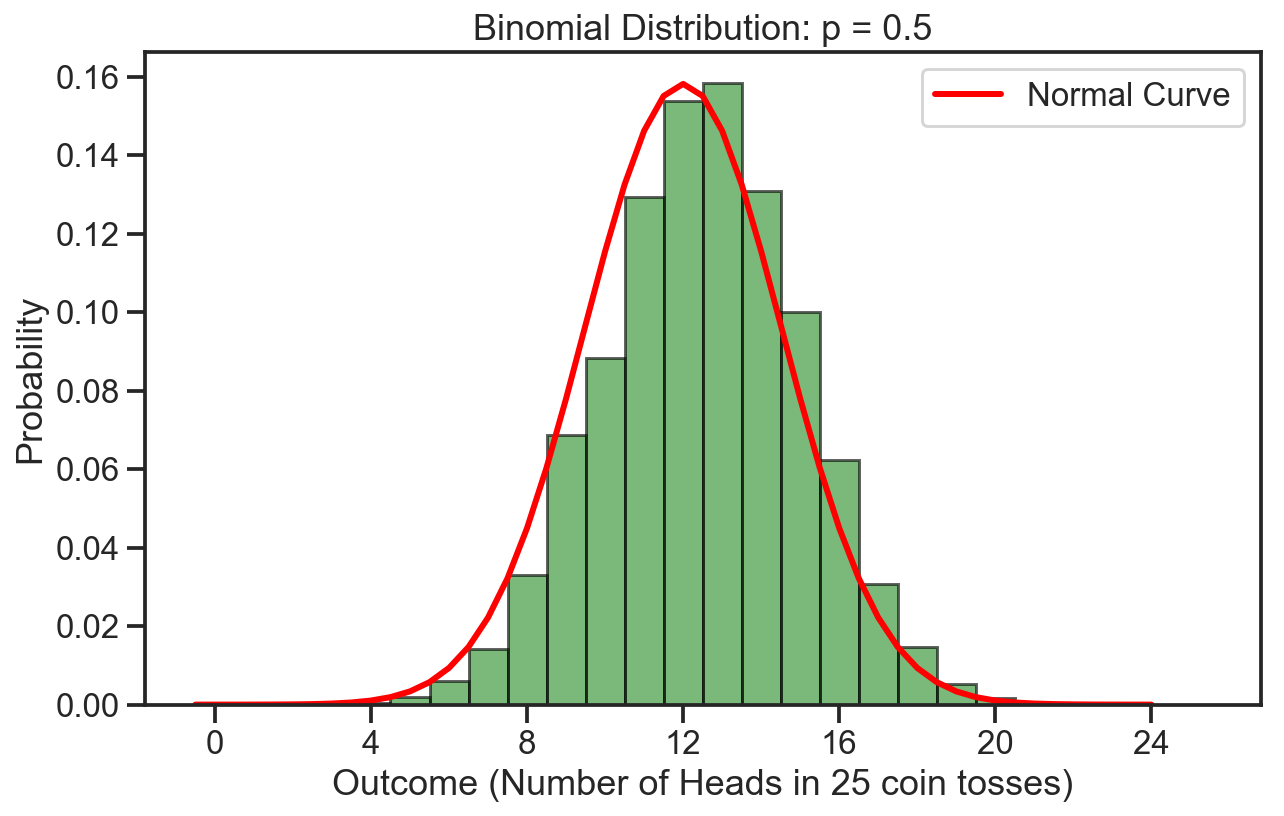

In [9]:
# generate binomial, n=25
fig = plt.figure(figsize=(10,6))
n = 25
data_binom = binom.rvs(n=n,p=0.5,size=10000)
bins = [i for i in range(n+2)]

ax = plt.hist(
    data_binom,
    bins=bins,
    density=True,
    rwidth=1,
    color='forestgreen',
    alpha=0.6,
    edgecolor="black"
)

plt.title('Binomial Distribution: p = 0.5')
plt.xlabel('Outcome (Number of Heads in 25 coin tosses)')
plt.ylabel('Probability')

xtick_loc = [i + 0.5 for i in range(n+1) if i % 4 == 0]
xtick_val = [i for i in range(n+1) if i % 4 == 0]
plt.xticks(xtick_loc, xtick_val)
x = np.arange(0, 25, 0.5)
p = norm.pdf(x, 12.5, data_binom.std())
plt.plot(x, p, 'k', linewidth=3, c='r')
plt.legend(['Normal Curve'])

plt.show()

Which brings us to our main goal in this post, that is to answer the following:

> How would _you_ derive the equation of the red curve in the above plot?

This is by no means an easy question to answer! It took some of the worlds brightest minds many years to come to normal distribution equation we saw earlier. However, I found that the most fundamental gap I needed to fill in order to answer the above question was that relating to **functions**, particularly their **composition**. 

## 2. Functions: Mapping _input_ to _response_
Forget $x$s and $y$s for the moment, forget equations that have been rotely memorized. What is a function, and why would we even need one? 

Well let's consider the real world scenario where you are trying to buy a car. Let's say you know that the car was made in 2010 and it has 100,000 miles on it. Intuitively, and without even realizing it, you create a function that maps those features of the car, to what you feel it is worth. Maybe you think that car is worth 4,000 dollars. That means that in some way you decided in your head that there is a function, which we can call $Car \;Price \;Estimator$:

$$Function = Car \; Price \; Estimator $$

And it takes two inputs, the year it was made and the number of miles on it:

$$Car \; Price \; Estimator (Year \; made, number \; of \; miles)$$

And that yielded an output, of 4,000 dollars:

$$Car \; Price \; Estimator (2010, 100000 \;miles) = 4000 \; dollars$$

This can be seen visually as well:

<br>
<img src="https://drive.google.com/uc?id=1nzWv2dubxT8dLgOcF_fR07uUqiyM74X4" width="600">
<br>

Think of how often that may happen-a situation where you take in information about the world around you, and you then say "hmmm there is definitely a relationship between these two things". Well, in mathematical terms that relationship is a function. If you are wondering, "why do we need to turn a normal everyday relationship into a mathematical equation?", well, the simplest answer is because it allows you to do very powerful things. 

As a motivator for why functions are so powerful I will leave you with this list of what they can and currently do:
1. We can create functions that define the relationship between certain images of tumor cells and whether or not the patient actually has cancer

$$Function = Cancer \; Detector$$

$$Cancer \; Detector(\text{Image of tumor cells}) \rightarrow \text{Patient has cancer, yes or no}$$

2. We can create functions that take in thousands of pixels associated with image and then determine what is in that image

$$Function = Image \; Classifier$$

$$Image \; Classifier(\text{Image of dog on a boat}) \rightarrow \text{Image contains: Dog, boat}$$


3. We can create functions that predict given a certain population and its characteristics, how quickly will a disease spread. 

$$Function = Disease \; Spread$$

$$Disease \; Spread(\text{Population Characteristics}) \rightarrow \text{Disease spread rate}$$

Okay, so with that in mind I want us to remember that a function can be thought of as a map of a relationship. From a more abstract point of view, a function can be considered a **process** that relates (or maps) and input to a single element, the output:

<img src="https://drive.google.com/uc?id=1x-CFHKN2EpAvQfRCxrhaZmDeWUNpHSKY" width="500">

Bringing in a slightly more formal terminology, we say that:

> A function is a relationship that associates each element x of a set X, the **domain** of the function, to a single element y of another set Y (possibly the same set), the **codomain** of the function. If the function is called $f$, the relation is denoted $y= f(x)$.

### 2.1 Graphs of Functions
Now that we have an intuitive understanding of what a function is actually representing, we can move on to graphing of a function. There is something incredibly subtle that takes place here, which will be of utmost importance that we fully grasp before moving on. 

Let's consider the function:

$$f(x) = x^2$$

This incredibly simple function, which I am confident that anyone reading this post has come across before, can be visualized below:

In [23]:
from matplotlib import rc, animation
sns.set_style("whitegrid")
sns.set_context("talk", rc={"lines.linewidth": 2})
rc('axes', linewidth=2)
sns.set_palette("tab10")

def square(x):
    return x ** 2

Text(0, 0.5, 'Y')

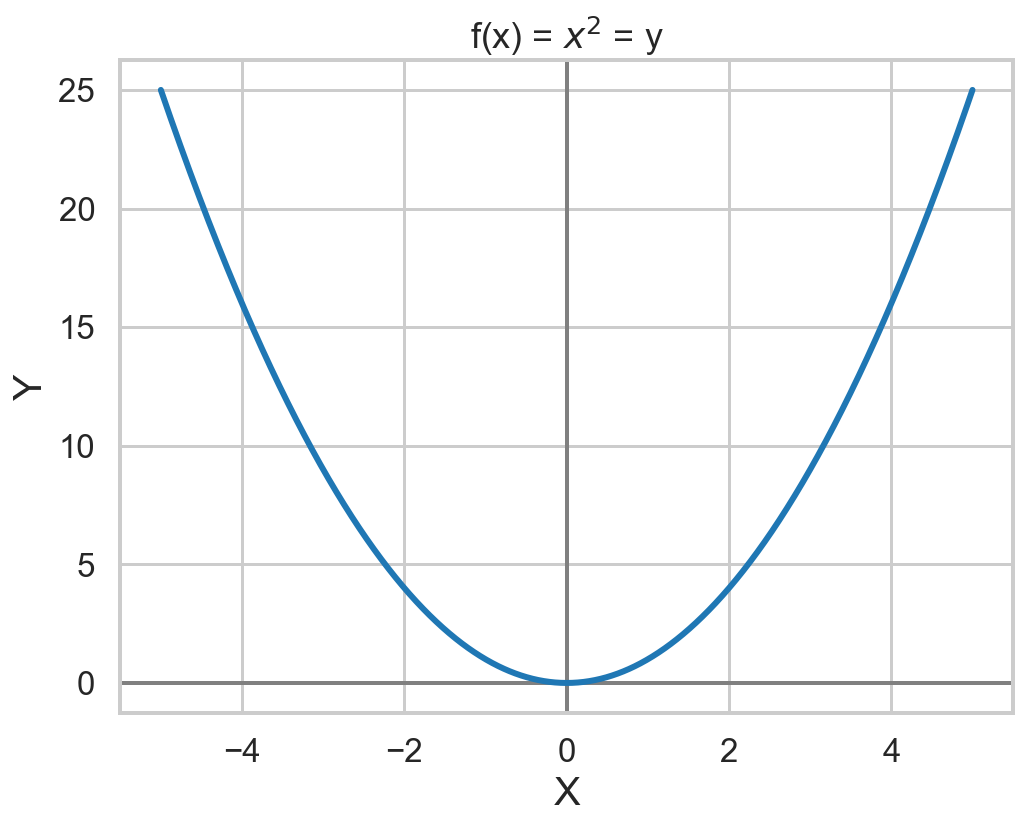

In [37]:
fig, ax = plt.subplots(figsize=(8,6))

plt.axhline(y=0, color='grey')
plt.axvline(x=0, color='grey')

lower_bound = -5
upper_bound = 5
composition_upper_bound = 25 
length = 2000

x = np.linspace(lower_bound, upper_bound, length)
y = square(x) 

plt.plot(x, y, lw=3)
plt.title(r'f(x) = $x^2$ = y')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)

Nothing ground breaking going on just yet. Now, an equivalent representation (_isomorphic_ if you will), can be seen in the following table:

|x|f(x)|
|---|---|
|-5|25|
|-4|16|
|-3|9|
|-2|4|
|-1|1|
|0|0|
|1|1|
|2|4|
|3|9|
|4|16|
|5|25|

I don't imagine that anyone would disagree with me in saying that the able and graph are equivalent representations of the same thing; that is the function $f(x) = x^2$ evaluated from $[-5, 5]$. Now, as students we are taught to view the function, $f$, and it's graphical representation as _equivalent_. And, for the most part this is true. However, this view point is slightly narrow and can lead to confusion, especially when we get to **composition of functions**. 

For instance, what if I changed the inputs $x$ in the table above to be as follows:

|x|f(x)|
|---|---|
|-5|25|
|-3|9|
|-4|16|
|2|4|
|5|25|
|-1|1|
|3|9|
|0|0|
|1|1|
|2|4|
|4|16|
|-2|4|

Each individual row checks out, however, our $x$ values are no longer ordered. This means that if we do not order the table, we cannot produce a corresponding plot. This _does not_ mean that the table above is invalid! A function _does need_ to take in an interval of ordered $x$ inputs; a function can take in anything that is part of it's domain (in this case all real numbers). The only time $x$ needs to be ordered is if we plan on creating a graphical representation of the function.

Now, an even more subtle point to consider; when dealing with graphical representations of functions we are really taking in _two_ inputs: An index/$x$ location where our output should be mapped to, and the input value that we are mapping. For instance, in the case of our squaring function, you may initially think that the input to output mapping would look like:

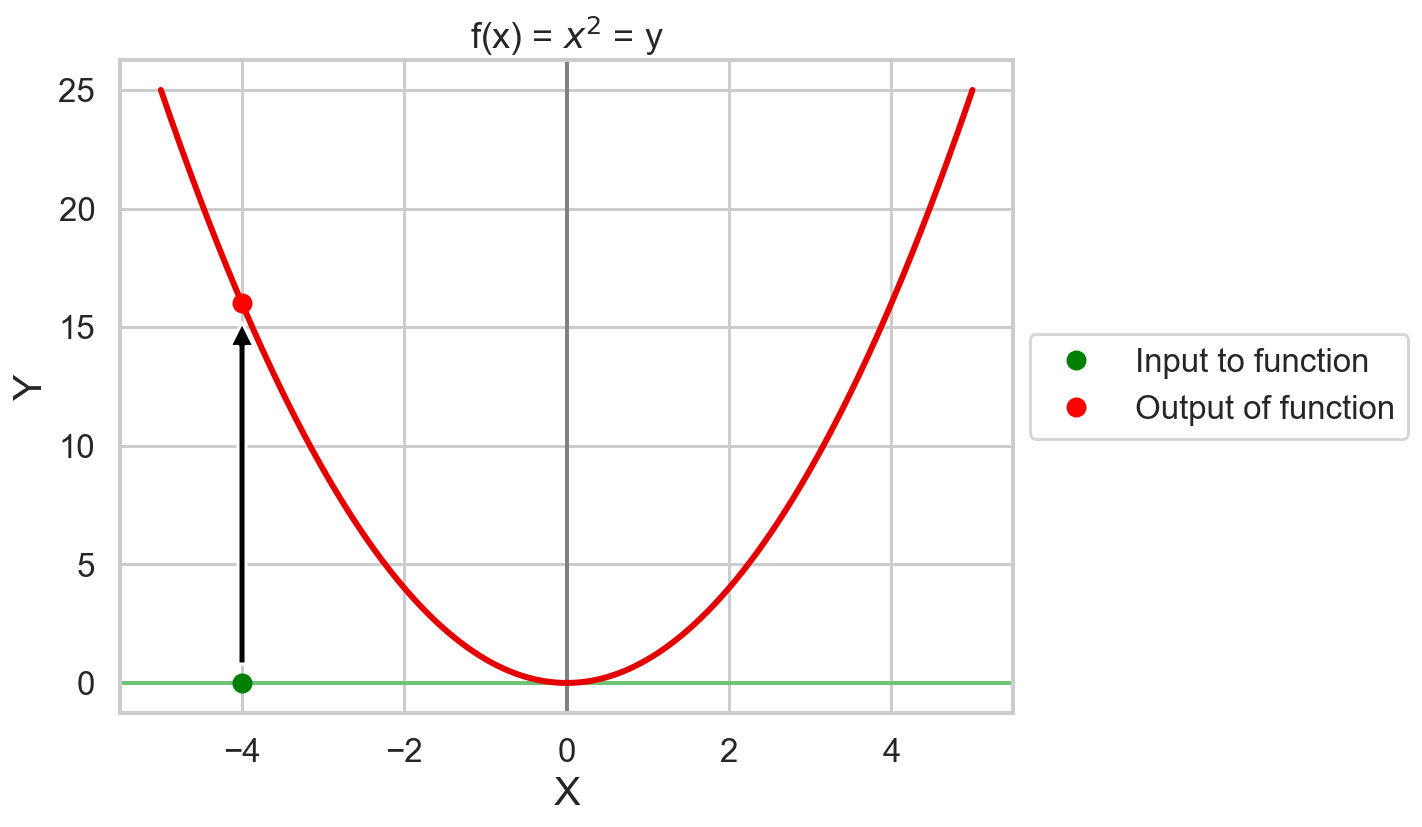

In [56]:
fig, ax = plt.subplots(figsize=(8,6))

plt.axhline(y=0, color=sns.xkcd_rgb["soft green"])
plt.axvline(x=0, color='grey')

lower_bound = -5
upper_bound = 5
composition_upper_bound = 25 
length = 2000

x = np.linspace(lower_bound, upper_bound, length)
y = square(x) 

plt.plot(x, y, lw=3, c=sns.xkcd_rgb["red"])

marker_squared, = ax.plot(-4, 16, 'or', zorder=5)
marker_x, = ax.plot(-4, 0, 'og', zorder=5)

func_arrow_square = ax.annotate(
    '',
    xy=(-4, square(-4)),
    xytext=(-4, 0),
    arrowprops=dict(facecolor='black', shrink=0.05),
)

plt.title(r'f(x) = $x^2$ = y')

# Put a legend to the right of the current axis
ax.legend(
    (marker_x, marker_squared),
    ['Input to function', 'Output of function'],
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
plt.show()

The above plot is correct in that it takes an input $x=-4$, evaluates the function $f$, and plot's the result. So, our coordinates are mapped as such:

$$(-4, 0) \rightarrow (-4, 16)$$

See that our $x$ coordinate does not change. That is a fundamental concept of graphical representations of functions. When you evaluate a particular input from the domain, $x$, you then graph the output, $y$ at the same $x$ coordinate. This is seen clearly by the black arrow representing our squaring function, $f$; notice that it is **perpendicular**. Realize that this is _not_ a fundamental property of the function $f$; rather it is used specifically by the graphing of a function. To really highlight this point:

**Stand Alone Function**<br>

$$f(x) \rightarrow y$$

$$f(-4) \rightarrow 16$$

**Graphed Function**<br>

$$f(\text{x_location}, \text{x_value}) \rightarrow (\text{x_location}, y)$$

$$f((-4, -4)) \rightarrow (-4,16)$$

This is often a new way of view functions for most people (myself included), so I encourage you to take a moment to let this subtle change sink in. Once you have, you may realize what was wrong with the plot above. 

Based on the idea that in reality the graphical representation of a function must take in _two_ values, $\text{x_location}$ and $\text{x_value}$, you can see what is wrong with our green input point. It's $\text{x_location}$ is correct; it is equal to -4. However, it's $\text{x_value}$ is incredibly ambiguous! You most likely determine in your head that the $\text{x_value}$ must also be -4, but based on the visual representation we have provided, is is actually 0! This is often the case when we take our $x$ axis and treat it both as the location and value of our input.

Why is this so important? Well, it creates an incredibly shaky foundation for us to build a top of as we head towards function composition! There is no way to fully intuit function composition if we are working inside of this ambigious frame work. The solution is as follows:

> We need to ensure that when graphing functions our input curve/point has an unambiguous $\text{x_location}$ and $\text{x_value}$

This can be done by no longer using the $x$ axis as both the location and input to our function, but instead use the line $y=x$! Visually this will become more clear:

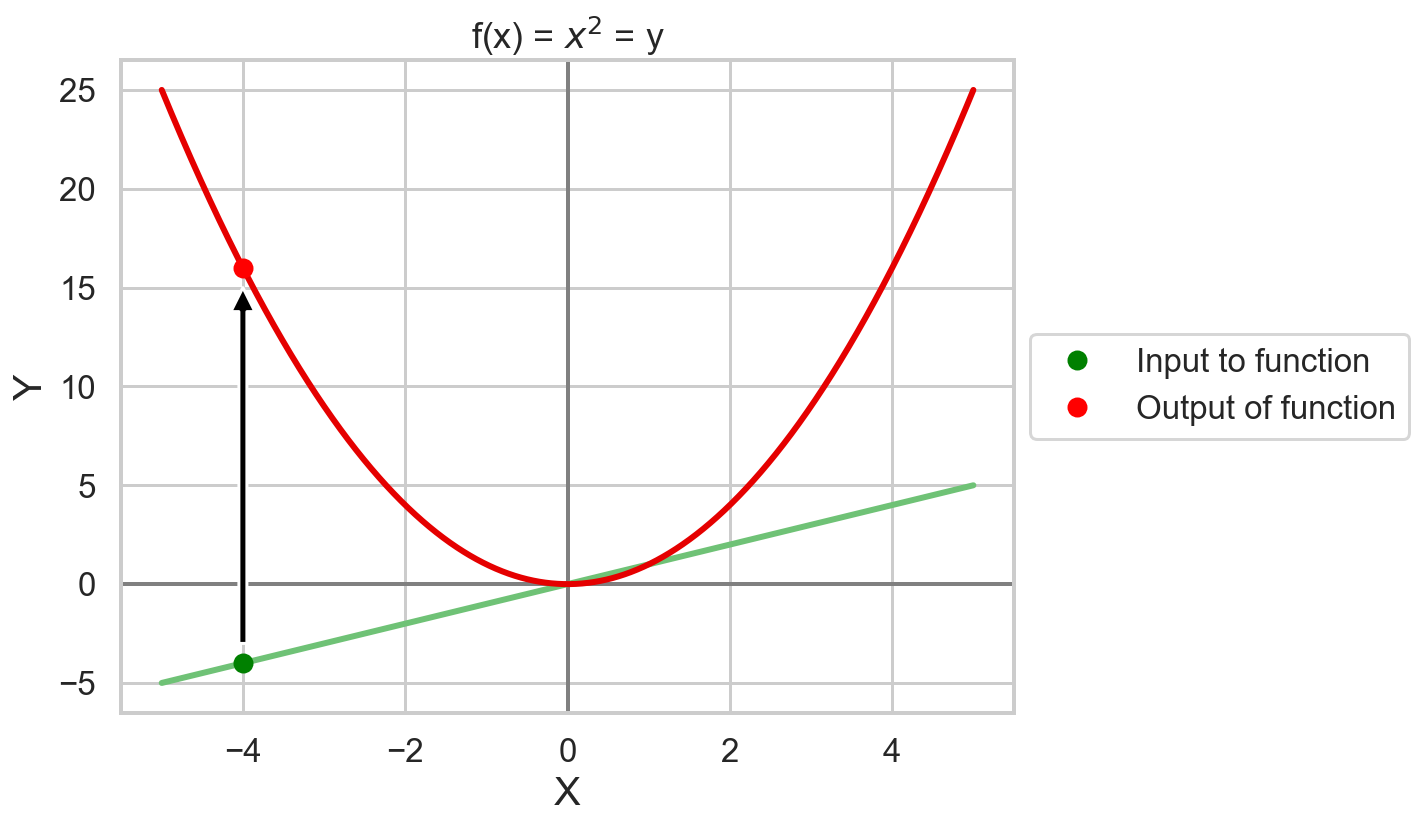

In [57]:
fig, ax = plt.subplots(figsize=(8,6))

plt.axhline(y=0, color='grey')
plt.axvline(x=0, color='grey')

lower_bound = -5
upper_bound = 5
composition_upper_bound = 25 
length = 2000

x_loc = np.linspace(lower_bound, upper_bound, length)
x_val = x_loc 
y = square(x_val) 

plt.plot(x_loc, x_val, lw=3, c=sns.xkcd_rgb["soft green"])
plt.plot(x, y, lw=3, c=sns.xkcd_rgb["red"])

marker_squared, = ax.plot(-4, 16, 'or', zorder=5)
marker_x, = ax.plot(-4, -4, 'og', zorder=5)

func_arrow_square = ax.annotate(
    '',
    xy=(-4, square(-4)),
    xytext=(-4, -4),
    arrowprops=dict(facecolor='black', shrink=0.05),
)

plt.title(r'f(x) = $x^2$ = y')

# Put a legend to the right of the current axis
ax.legend(
    (marker_x, marker_squared),
    ['Input to function', 'Output of function'],
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
plt.show()

Excellent, our input now is incredibly unambiguous! Our function $f$, when graphed, takes in an $\text{x_location}$ and $\text{x_value}$, in this case: $(-4, -4)$. 

This can be done for every single point along the line $y=x$:

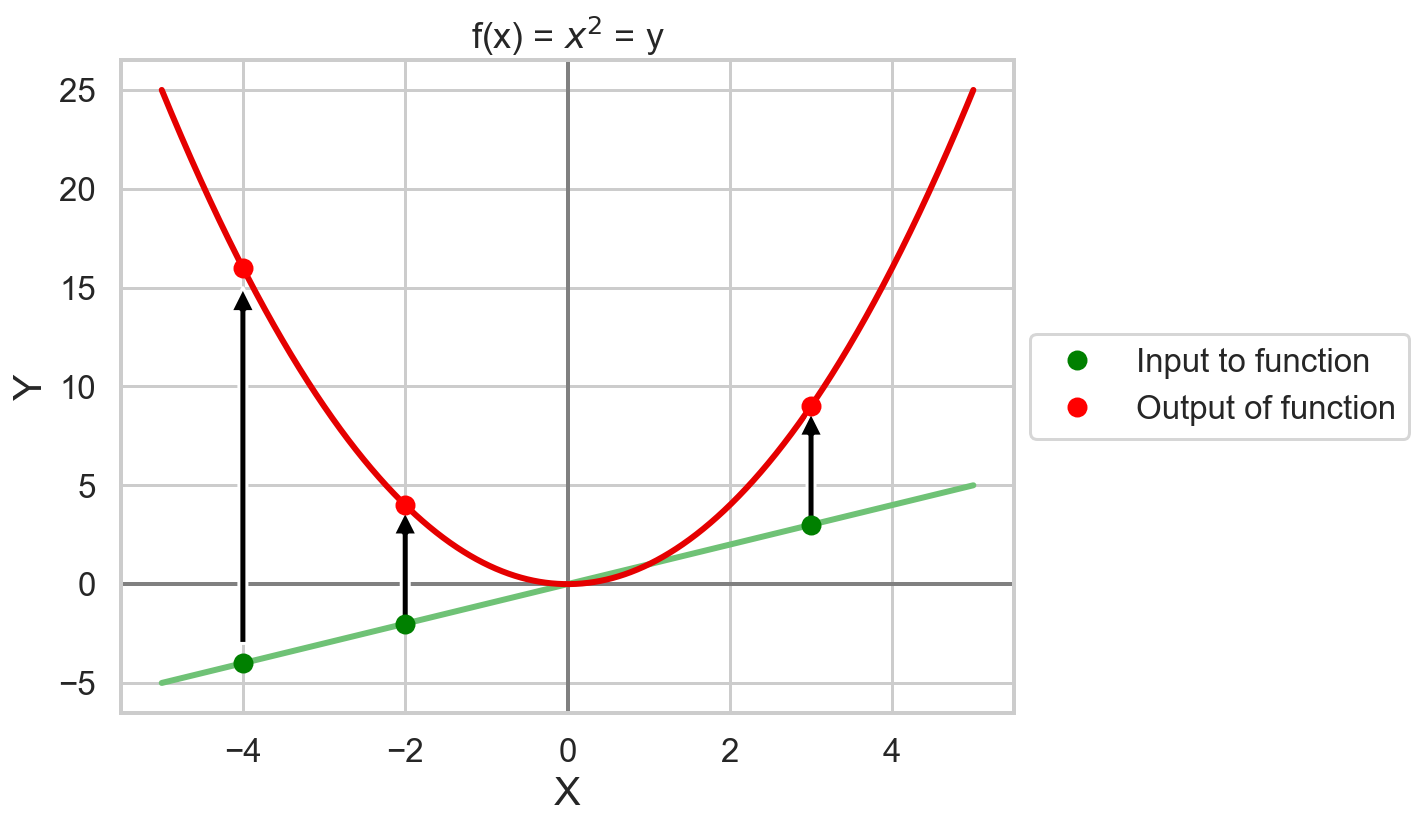

In [66]:
fig, ax = plt.subplots(figsize=(8,6))

plt.axhline(y=0, color='grey')
plt.axvline(x=0, color='grey')

lower_bound = -5
upper_bound = 5
composition_upper_bound = 25 
length = 2000

x_loc = np.linspace(lower_bound, upper_bound, length)
x_val = x_loc 
y = square(x_val) 

plt.plot(x_loc, x_val, lw=3, c=sns.xkcd_rgb["soft green"])
plt.plot(x, y, lw=3, c=sns.xkcd_rgb["red"])

marker_squared_1, = ax.plot(-4, 16, 'or', zorder=5)
marker_x_1, = ax.plot(-4, -4, 'og', zorder=5)

marker_squared_2, = ax.plot(-2, 4, 'or', zorder=5)
marker_x_2, = ax.plot(-2, -2, 'og', zorder=5)

marker_squared_3, = ax.plot(3, 9, 'or', zorder=5)
marker_x_3, = ax.plot(3, 3, 'og', zorder=5)\

func_arrow_square_1 = ax.annotate(
    '',
    xy=(-4, square(-4)),
    xytext=(-4, -4),
    arrowprops=dict(facecolor='black', shrink=0.05),
)

func_arrow_square_2 = ax.annotate(
    '',
    xy=(-2, square(-2)),
    xytext=(-2, -2),
    arrowprops=dict(facecolor='black', shrink=0.05),
)

func_arrow_square_3 = ax.annotate(
    '',
    xy=(3, square(3)),
    xytext=(3, 3),
    arrowprops=dict(facecolor='black', shrink=0.05),
)

plt.title(r'f(x) = $x^2$ = y')

# Put a legend to the right of the current axis
ax.legend(
    (marker_x, marker_squared),
    ['Input to function', 'Output of function'],
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
plt.show()

You can see why this generally does not cause any issue! When dealing with just one function operating on it's own, we can utilize the $\text{x_location}$ _as the_ $\text{x_value}$! We have been doing this since middle school when functions and their corresponding graphs were introduced. 

You may be wondering why on earth we have introduced a seemingly more complex paradigm and notation, when our old method worked well enough to begin with? To answer that question, we will need to introduce **function compositions**.